# u(t,x) = 3t+5x
### u_t = 0.6u_x
### u(0,x) = 5x
### u(t,0) = 3t
### u(t,8) = 3t+40

In [1]:
## Independent variable functions
#      u(0,x) = f(x)
#      u(t,0) = g1(t)
#      u(t,x_n) = g2(t)
def f(x):
    """Inputs position array x and outputs f(x)."""
    import numpy as np
    return 5 * x

def g1(t):
    """Inputs time array t and outputs g1(t)."""
    import numpy as np
    return 3 * t

def g2(t):
    """Inputs time array t and outputs g2(t)."""
    import numpy as np
    return 3 * t + 40




## Matrix generation functions
def initial_u_matrix(t_val,x_val):
    """
    Creates a very specific matrix that includes all our initial and boundary values such that our
    unknown values are 0.
    
    This foundation will be:
    [u(t_0,x_0)  u(t_1,x_0)  u(t_2,x_0)  ...  u(t_n,x_0)]
    [u(t_0,x_1)      0           0       ...      0     ]
    [u(t_0,x_2)      0           0       ...      0     ]
    [    ...        ...         ...              ...    ]
    [u(t_0,x_n)  u(t_1,x_n)  u(t_2,x_n)  ...  u(t_n,x_n)]
    """
    import numpy as np
    
    # Create our zero matrix and make the first row t_val
    matrix = np.zeros((x_val.size,t_val.size))
    matrix[0] = g1(t_val)
    
    # Make the first column x_val and last row 1+t_val
    matrix[:,0] = f(x_val)
    matrix[-1] = g2(t_val)
    
    return matrix

def semid_matrix(dimension):
    """
    Inputs a dimension to generate an nxn matrix with -1,0,1 in each row and 0 in the diagonal.
    
    We'll do this by generating two matrices and adding them together
    """
    import numpy as np
    
    # Matrix 1
    # Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal 1's
    mat1 = np.zeros((dimension-1,dimension-1), dtype = "int8")
    np.fill_diagonal(mat1, int(1))
    
    # Add a row of 0's to the bottom and column of 0's to the left
    row = np.zeros((dimension-1,1), dtype = "int8")
    mat1 = np.hstack((row, mat1))

    column = np.zeros((1,dimension), dtype = "int8")
    mat1 = np.vstack((mat1, column))
    
    
    
    
    # Matrix 2
    # Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal -1's
    mat2 = np.zeros((dimension-1,dimension-1), dtype = "int8")
    np.fill_diagonal(mat2, int(-1))
    
    
    
    
    # Add a row of 0's to the top and column of 0's to the right
    row = np.zeros((dimension-1,1), dtype = "int8")
    mat2 = np.hstack((mat2, row))

    column = np.zeros((1,dimension), dtype = "int8")
    mat2 = np.vstack((column, mat2))
    
    
    
    
    # Output our completed matrix
    return mat1 + mat2

def forward_matrix(dimension, p):
    """
    Inputs a dimension to generate an nxn matrix with 1-p,p in each row and 1-p in the diagonal.
    """
    import numpy as np
    
    # Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal p
    mat = np.zeros((dimension-1,dimension-1))
    np.fill_diagonal(mat, p)
    
    # Add a row of 0's to the bottom and column of 0's to the left
    row = np.zeros((dimension-1,1), dtype = "int8")
    mat = np.hstack((row, mat))

    column = np.zeros((1,dimension), dtype = "int8")
    mat = np.vstack((mat, column))
    
    # Make its diagonal 1-p and output the matrix
    np.fill_diagonal(mat, 1-p)
    
    return mat

def backward_matrix(dimension,p):
    """
    Inputs a dimension to generate an nxn matrix with 1-p^(-1),p^(-1) in each row and 1-p^(-1) in the diagonal.
    """
    import numpy as np
    
    p_inv = p**-1 # Set a variable equal to p^(-1) to optimize this function
    
    # Generate the 0 matrix as our starting point, make it 1 rows/columns shorter, and make its diagonal p^(-1)
    mat = np.zeros((dimension-1,dimension-1))
    np.fill_diagonal(mat, p_inv)
    
    # Add a row of 0's to the bottom and column of 0's to the left
    row = np.zeros((dimension-1,1), dtype = "int8")
    mat = np.hstack((row, mat))

    column = np.zeros((1,dimension), dtype = "int8")
    mat = np.vstack((mat, column))
    
    # Make its diagonal 1-p^(-1) and output the matrix
    np.fill_diagonal(mat, 1-p_inv)
    
    return mat




## Graphing functions
def graph_3d(t,x,u):
    """Inputs position matrix (x), time matrix (t), and
    resulting displacement matrix (u) to generate a 3D surface graph."""
    
    # Import libraries
    from mpl_toolkits import mplot3d
    import numpy as np
    import matplotlib.pyplot as plt
    
    # Create 3D axis and plot points
    fig = plt.figure(figsize=(16,12))
    ax = plt.axes(projection='3d')
    

    
    
    ax.plot_surface(x, t, u, cmap = 'viridis')
    
    # Label the axes
    ax.set_xlabel('Position')
    ax.set_ylabel('Time')
    ax.set_zlabel('Displacement')
    
    # Rotate and display the plot
    ax.view_init(40,250)
    ax.set_box_aspect(None, zoom=1)
    plt.show()

In [2]:
## Semi-Discretization Approximation
def semid_approx(T_val,X_val,x_width,t_int):
    """
    Inputs t and x value mesh matrices.
    
    Outputs an approximated u matrix using Semi-Discretization Approximation
    """
    import numpy as np
    # Create the foundation for our output matrix
    U_val = initial_u_matrix(T_val[0],X_val[:,0])
    
    # Create our derivative and identity matrices for V(t)
    D1_matrix = semid_matrix(X_val[:,0].size-2)
    I_matrix = np.identity(X_val[:,0].size-2)
    
    # Create an array that's necessary for later math to work out
    temp_array = np.zeros(X_val[:,0].size-2)
    
    # Make our m-constant that's important for upcoming math
    m = 3 / (10 * x_width)
    
    
    # Go through every column in our U-matrix that hasn't pre-emptively been filled in
    # This would be the 2nd column all the way to the last one.
    for column in range(1, t_int+1):
            
        # The zeros in each column go through ALL x-values from x_1 to x_{n-1}
        # Each column is one SPECIFIC t-value though
        temp_t = T_val[0][column]
        
        
        # Alter our temp array based on the current t-value
        temp_array[0] = -6 * (temp_t ** 2)
        temp_array[1] = 3 * m * (temp_t ** 3)
        temp_array[-2] = 3 * m * (temp_t ** 3) + 40 * m * (temp_t ** 2)
        temp_array[-1] = 6 * (temp_t ** 2) + 80 * temp_t
            
        # Make an array that will replace the 0's in the current column
        temp_u = np.matmul( I_matrix + m * temp_t * D1_matrix , f(X_val[:,0][1:-1]) ) + 0.5 * m * temp_array
        U_val[:,column][1:-1] = temp_u
    
    return U_val # Output our approximated displacement
    
    
    
    
## Forward Finite Approximation
def forward_approx(T_val,X_val,t_width,x_width,t_int):
    """
    Inputs t and x value mesh matrices.
    
    Outputs an approximated u matrix using Forward Finite Approximation
    """
    import numpy as np
    # Create the foundation for our output matrix
    U_val = initial_u_matrix(T_val[0],X_val[:,0])
    
    # Generate matrices for computations
    D1_matrix = forward_matrix(X_val[:,0].size-2, (0.6*t_width)/(x_width))
    temp_array = np.zeros(X_val[:,0].size-2)
    
    # Go through every column in our U-matrix that hasn't pre-emptively been filled in
    # This would be the 2nd column all the way to the last one.
    for column in range(1, t_int+1):
        
        # Set the last value of the temp_array
        temp_array[-1] = ((0.6*t_width)/(x_width)) * (3 * column + 40)
        
        # Make an array that will replace the 0's in the current column
        temp_u = np.matmul(D1_matrix , U_val[1:-1,column-1]) + temp_array
        U_val[1:-1,column] = temp_u
    
    return U_val # Output our approximated displacement
    
## Backward Finite Approximation
def backward_approx(T_val,X_val,t_width,x_width,x_int):
    """
    Inputs t and x value mesh matrices.
    
    Outputs an approximated u matrix using Backward Finite Approximation
    """
    import numpy as np
    # Create the foundation for our output matrix
    U_val = initial_u_matrix(T_val[0],X_val[:,0])
    
    # Generate matrices for computations and set p^(-1) value
    D1_matrix = backward_matrix(T_val[0].size-1, (0.6*t_width)/(x_width))
    temp_array = np.zeros(T_val[0].size-1)
    
    p_inv = (x_width) / (0.6 * t_width)
    
    # Go through every row in our U-matrix that hasn't pre-emptively been filled in
    # This would be the 2nd row all the way to the penultimate one.
    # Note we need to go through the rows BACKWARDS
    for r in range(1,x_int):
        row = x_int - r
        
        # Set the first value of the temp_array
        temp_array[0] = p_inv * 5 * X_val[row+1,0]
        
        # Make an array that will replace the 0's in the current row
        temp_u = np.matmul( U_val[row+1,1:] , D1_matrix ) + temp_array
        U_val[row,1:] = temp_u
        
    return U_val # Output our approximated displacement

In [3]:
def numerical_approx(t_int,x_int,include_fd,include_bd):
    """
    Input the number of time and position intervals to approximate the PDE u_t=0.6*u_x.
    
    Note that the maximum time is set to 1 since the approximation dramatically weakens afterwards.
    
    Uses the data to then output absolute error comparison methods for the three available methods.
    """
    # Import Modules
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    begin = time()
    
    
    
    
    # Make our arrays of x and t inputs and the x interval width constant
    t_val = np.linspace(0, 1, t_int+1)
    x_val = np.linspace(0, 8, x_int+1)
    t_width = 1 / t_int
    x_width = 8 / x_int

    
    # Make our input arrays into repeated matrices
    T_val, X_val = np.meshgrid(t_val,x_val)
    
    
    # Creates our approximated outputs and also the actual output for comparisons
    semid_output = semid_approx(T_val,X_val,x_width,t_int)
    if include_fd == True:
        forward_output = forward_approx(T_val,X_val,t_width,x_width,t_int)
    if include_bd == True:
        backward_output = backward_approx(T_val,X_val,t_width,x_width,x_int)
    actual_output = (5 * X_val) + (3 * T_val)

    
    
    
    # Width of T_val divided by 2 gives Q2 for TIME
    t_pt = T_val[0][T_val.shape[1] // 2]
    semid_t = semid_output[:,T_val.shape[1] // 2]
    if include_fd == True:
        forward_t = forward_output[:,T_val.shape[1] // 2]
    if include_bd == True:
        backward_t = backward_output[:,T_val.shape[1] // 2]
    actual_t = actual_output[:,T_val.shape[1] // 2]
    
    semid_error_t = abs(semid_t - actual_t)
    if include_fd == True:
        forward_error_t = abs(forward_t - actual_t)
    if include_bd == True:
        backward_error_t = abs(backward_t - actual_t)

    # Height of X_val divided by 2 gives Q2
    x_pt = X_val[X_val.shape[0] // 2][0]
    semid_x = semid_output[X_val.shape[0] // 2]
    if include_fd == True:
        forward_x = forward_output[X_val.shape[0] // 2]
    if include_bd == True:
        backward_x = backward_output[X_val.shape[0] // 2]
    actual_x = actual_output[X_val.shape[0] // 2]
    
    semid_error_x = abs(semid_x - actual_x)
    if include_fd == True:
        forward_error_x = abs(forward_x - actual_x)
    if include_bd == True:
        backward_error_x = abs(backward_x - actual_x)
    
    
    
    
    # Set up subplot qualities
    plt.figure(figsize=(20,8))
    plt.suptitle("Absolute Errors")
    plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
    
    ### u(Q2,x)
    plt.subplot(1,2,1)
    plt.ylabel("Difference")
    plt.title(f"u({round(t_pt,3)},x)")
    plt.xlabel("Position")
    
    plt.plot(x_val,semid_error_t, color="red", label="Semi-Discrete")
    if include_fd == True:
        plt.plot(x_val,forward_error_t, color="green", label="Forward Difference")
    if include_bd == True:
        plt.plot(x_val,backward_error_t, color="blue", label="Backward Difference")
    plt.legend()
    
    
    ### u(t,Q2)
    plt.subplot(1,2,2)
    plt.title(f"u(t,{round(x_pt,3)})")
    plt.xlabel("Time")
    
    plt.plot(t_val,semid_error_x, color="red", label="Semi-Discrete")
    if include_fd == True:
        plt.plot(t_val,forward_error_x, color="green", label="Forward Difference")
    if include_bd == True:
        plt.plot(t_val,backward_error_x, color="blue", label="Backward Difference")
    plt.legend()
    
    
    
    
    # Display the plot and the total run time
    plt.show()
    #graph_3d(T_val,X_val,semid_output)
    #if include_fd == True:
        #graph_3d(T_val,X_val,forward_output)
    #if include_bd == True:
        #graph_3d(T_val,X_val,backward_output)
    #graph_3d(T_val,X_val,actual_output)
    
    print(f"Finished in {round(time()-begin,3)} seconds.")

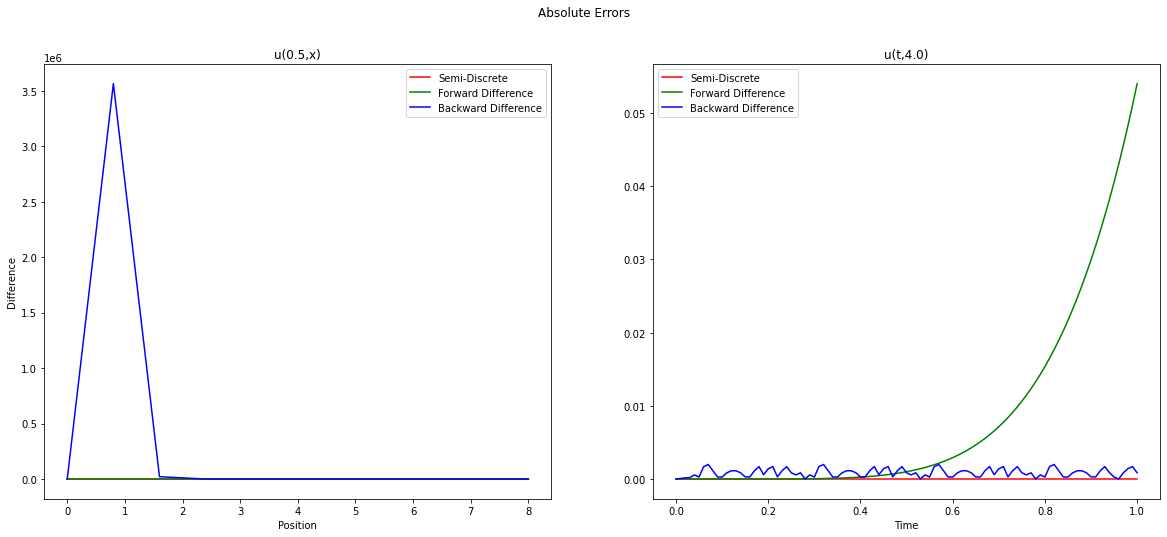

Finished in 0.268 seconds.


In [7]:
# Third value is True if you want to include Forward Difference Info
# Fourth value is True if you want to include Backward Difference Info
numerical_approx(100,10,True,True)